6E1. List three mechanisms by which multiple regression can produce false inferences about causal
effects.

Ans: The biases studied in the chapter

1. Collider bias
2. Post treatment bias
3. Omitted variable bias
4. Multicolinearity

6E2. For one of the mechanisms in the previous problem,provide an example of your choice,perhaps from your own research.

Ans: Omitted Variable Bias

Occurs when a predictor variable is NOT included in the regression model, and this variable has the following 2 criteria:
1. it's correlated with one or more of the other predictor variables
2. it's correlated with the outcome variable 

As you can see, this is a case of missing information.

Consider the following example adapted from (https://www.statology.org/omitted-variable-bias/)

Consider we're trying to predict house price $P$ based on its square footage $S$ and age $A$ where:

- Square footage is positively correlated with price (bigger houses are more expensive)
- Age is negatively correlated with price (older houses sell lower
- but Age is positively correlated with square footage (older houses are bigger)

Then, if we omit age, we might estimate an older house to be more expensive than it should (positively bias).

6E3. List the four elemental confounds. Can you explain the conditional dependencies of each? 

Ans: These are the 3 structural forces that we studied. For variabes $X,Y,Z$ to measure if there is causal effect of $X$ on $Y$, you can have false inferences due to: 

1. The Fork: If $X,Y$ have common cause $Z$, then conditioning on $Z$ makes them independent
2. The Collider: If $X,Y$ have common effect $Z$, then conditioning on $Z$ makes them conditinally dependent
3. The Pipe: If $X \rightarrow Z \rightarrow Y$, then conditioning on $Z$ makes them conditionally independent
4. The Descendant: if we have variable $D$ which is a descendant (caused by) any othe other 3, conditioning on it will make it behave like the variable it was conditioned on. For example if we have $X \rightarrow Z \rightarrow Y$ and $Z \rightarrow D$, then conditioning on $D$ will have the same effect of conditioing on $Z$ since it carries the same information like it making $X,Y$ conditionally independent. 

6E4. How is a biased sample like conditioning on a collider? Think of the example at the open of the chapter.

Ans: Conditoning on a collider means we introduce new information from this collider such that it allows us to stratify the predictor and outcome pairs based on it. It's as if prior to conditioning, all possible pairs of $(X,Y)$ variables were possible, but now only certain pairs become possible given the condition.

Also called Berkson Paradox: We create correlation where there was none.

A very common example is selection bias in medical studies performed on hospital patients. We could see a correlation between wearing helmets and ending up in ITU because of motor cycle accidents, and think that wearing helmets is dangerous. What we don't see is the people who didn't wear helmets and ended up dead. 

6M1. Modify the DAG on page 186 to include the variable V, an unobserved cause of C and Y: C ← V → Y. Reanalyze the DAG. How many paths connect X to Y? Which must be closed? Which variables should you condition on now?

<div>
    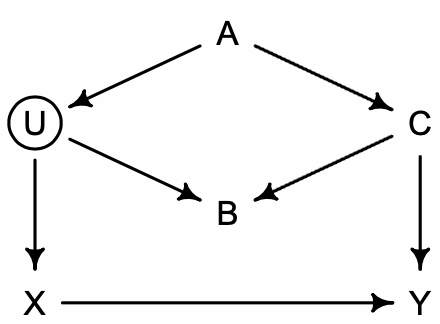
</div>

There are 5 paths from $X$ to $Y$

(1) X ← U ← A → C → Y

(2) X ← U → B ← C → Y← V

(3) X ← U ← A → C ← V →Y

(4) X ← U → B ← C ← V → Y

(5) X → Y

Path 1 is an open backdoor path. If we condition on A, we close it without opening 4

6M2. Sometimes, in order to avoid multicollinearity, people inspect pairwise correlations among predictors before including them in a model. This is a bad procedure, because what matters is the conditional association, not the association before the variables are included in the model. To highlight this, consider the DAG X → Z → Y. Simulate data from this DAG so that the correlation between X and Z is very large. Then include both in a model prediction Y. Do you observe any multicollinearity? Why or why not? What is different from the legs example in the chapter?

The model

$Z = f(X)$

$Z \text{~} N(\mu, \sigma)$

$\mu = \beta_x X_i$

let $\beta_x$ = 0.9

$Y = f(Z)$

$Y \text{~} N(\mu, \sigma)$

$\mu_z = \beta_z Z_i$

let $\beta_z$ = 0.7

so to predict $Y$ as a function of $X$ and $Z$

$Y = f(X,Z)$

$Y_i \text{~} N(\mu_i,\sigma)$

$\mu_i = \alpha + \beta_x X_i + \beta_z Z_i$

In [2]:
import numpy as np
import pymc3 as pm
import arviz as az
import matplotlib.pyplot as plt

In [17]:
#data simulation

X = np.random.normal(size = 100)
Z = np.random.normal(loc = 1.5*X)
Y = np.random.normal(loc = 0.7*Z)

In [18]:
# examine correlations
np.corrcoef(X,Z)

array([[1.        , 0.85331311],
       [0.85331311, 1.        ]])

In [19]:
np.corrcoef(Y,Z)

array([[1.        , 0.79913318],
       [0.79913318, 1.        ]])

In [20]:
#the model

with pm.Model() as m2:
    a = pm.Normal('a', mu = 0, sd = 0.2)
    bx = pm.Normal('bx', mu = 0, sd = 0.5)
    bz = pm.Normal('bz', mu = 0, sd = 0.5)
    sigma = pm.Exponential('sigma',1)
    
    mu = a + bx*X + bz*Z
    
    y_hat = pm.Normal('y_hat',mu = mu, sd = sigma, observed = Y)
    
    trace_m2 = pm.sample(1000, tune = 1000)

/var/folders/9p/5ycxgmps44zc3f0y6vljhp2h0000gn/T/ipykernel_87874/2230984618.py:13: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace_m2 = pm.sample(1000, tune = 1000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, bz, bx, a]


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 16 seconds.


In [21]:
az.summary(trace_m2)

/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,-0.039,0.093,-0.223,0.127,0.002,0.002,3254.0,2338.0,1.0
bx,-0.130,0.172,-0.451,0.195,0.004,0.003,2424.0,2287.0,1.0
bz,0.765,0.102,0.571,0.951,0.002,0.001,2459.0,2329.0,1.0
sigma,1.015,0.075,0.879,1.152,0.001,0.001,2979.0,2148.0,1.0


/Users/amralaa/anaconda3/envs/stat-rethink2-pymc3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


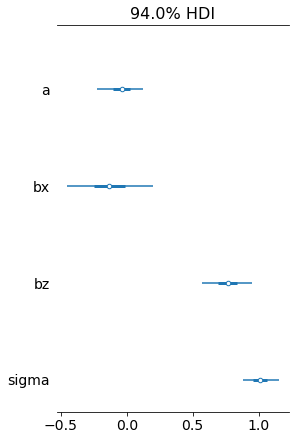

In [27]:
az.plot_forest(trace_m2, combined = True, figsize = (4,6));

In the leg example, both predictiors were produced from a third unmeasured confound. Therefore the model distributed the weights (betas) on both. 

In this case, Z is produced from X. Once we condition on Z, X becomes redundant and thus its $\beta_x$ goes down to 0.

6M3. Learning to analyze DAGs requires practice. For each of the four DAGs below, state which variables, if any, you must adjust for (condition on) to estimate the total causal influence of X on Y.

<div>
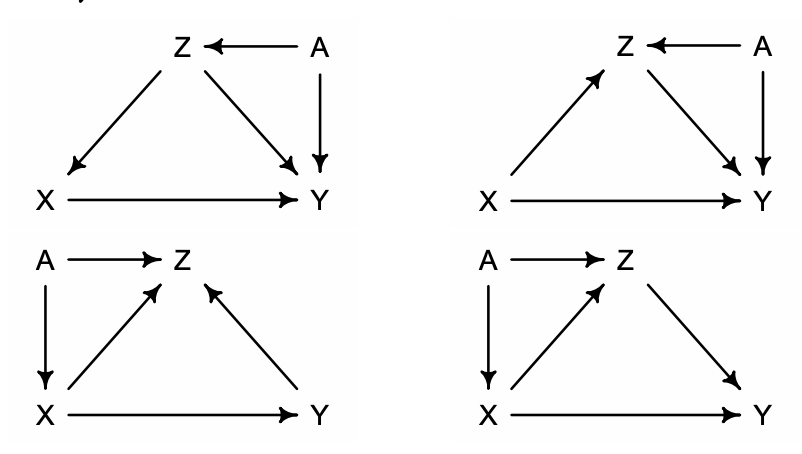
</div>

Ans:

Use the recipie from McElreath:

1. Identify all path from $X$ to $Y$
2. Identify open ones (a path is open unless it has collider)
3. Identify which are backdoor into $X$
4. Close open backdoor path into $X$ if possible

The main idea: open backdoor path into $X$ will have information not related to the causal influence of $X$ on $Y$

so for the examples above:

Top left: 
open backdoor path $X \leftarrow Z \leftarrow A \rightarrow Y$ and $X \leftarrow Z \rightarrow Y$

to close both: condition on $Z$

Top right: no backdoor paths into $X$, nothing to close

Bottom left:

paths: 

$X \rightarrow Y$

$X \rightarrow Z \leftarrow Y$

$X \leftarrow A \rightarrow Z \leftarrow Y$

path 3 is backdoor but contains collider so it's closed. Nothing to close.

Bottom right:

paths: 

$X \rightarrow Y$

$X \rightarrow Z \leftarrow Y$

$X \leftarrow A \rightarrow Z \rightarrow Y$

Path 3 is open backdoor. We can close it by conditiong on either $A$ or $Z$ but conditioning on $Z$ will close path 2 as well. So, we condition on $A$